<a href="https://colab.research.google.com/github/ahmadalideeb/machine-learning/blob/master/Lab4/MMO_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  numpy  as  np 
import  pandas  as  pd 
from  typing  import  Dict ,  Tuple 
from  scipy  import  stats 
from  sklearn.datasets  import  * 
from  sklearn.model_selection  import  train_test_split 
from  sklearn.neighbors  import  KNeighborsRegressor ,  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from  sklearn.metrics  import  accuracy_score ,  balanced_accuracy_score 
from sklearn.metrics  import  plot_confusion_matrix 
from  sklearn.metrics  import  precision_score ,  recall_score ,  f1_score ,  classification_report 
from  sklearn.metrics  import  confusion_matrix 
from  sklearn.metrics  import  mean_absolute_error ,  mean_squared_error ,  mean_squared_log_error ,  median_absolute_error ,  r2_score  
from  sklearn.metrics  import  roc_curve ,  roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import  seaborn  as  sns
import  matplotlib.pyplot  as  plt 
% matplotlib inline 
sns . set ( style = "ticks" )

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**Изучение качества классификации**
**Решение задачи классификации - это предсказание значений качественного (категориального) признака.**

##**Подготовка данных и построение базовых моделей для оценки качества**
Будем использовать набор данных "Breast cancer wisconsin".

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
cancer = load_breast_cancer()

In [3]:
# Наименования признаков
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
# Значения признаков
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [5]:
type(cancer.data)

numpy.ndarray

In [6]:
# Значения целевого признака
np.unique(cancer.target)

array([0, 1])

In [7]:
# Наименования значений целевого признака
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
list(zip(np.unique(cancer.target), cancer.target_names))

[(0, 'malignant'), (1, 'benign')]

In [9]:
# Значения целевого признака
cancer.target[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [10]:
# Размер выборки
cancer.data.shape, cancer.target.shape

((569, 30), (569,))

In [0]:
# Сформируем DataFrame
cancer_df = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],
                     columns= list(cancer['feature_names']) + ['target'])


In [12]:
# И выведем его статистические характеристики
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


###**Разделение выборки на обучающую и тестовую**

Для разделения выборки на обучающую и тестовую используется функция train_test_split.

In [0]:
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.5, random_state=1)

Как правило, параметр test_size устанавливают в 20% или 30%. Здесь используется test_size=0.5 (50%) чтобы искусственно "ухудшить" результат на хорошем наборе данных и показать различные возможности использования метрик качества.
<br><br>
Параметр random_state позволяет задавать базовое значение для генератора случайных чисел. Это делает разбиение неслучайным. Если задается параметр random_state то результаты разбиения будут одинаковыми при различных запусках. На практике этот параметр удобно использовать для создания "устойчивых" учебных примеров, которые выдают одинаковый результат при различных запусках.

In [14]:
# Размер обучающей выборки
cancer_X_train.shape, cancer_y_train.shape

((284, 30), (284,))

In [15]:
# Размер тестовой выборки
cancer_X_test.shape, cancer_y_test.shape

((285, 30), (285,))

Функция train_test_split разделила исходную выборку таким образом, чтобы в обучающей и тестовой частях сохранились все классы.


In [16]:
np.unique(cancer_y_train)

array([0, 1])

In [17]:
np.unique(cancer_y_test)

array([0, 1])

In [0]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [19]:
# В исходной выборке нет явного дисбаланса классов для целевого признака
print_class_proportions(cancer.target)

# Функция train_test_split разделила исходную выборку таким образом, 
# чтобы в обучающей и тестовой частях сохранились пропорции классов.

Метка 	 Количество 	 Процент встречаемости
0 	 212 	 	 37.26%
1 	 357 	 	 62.74%


In [20]:
# Для обучающей выборки
print_class_proportions(cancer_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 109 	 	 38.38%
1 	 175 	 	 61.62%


In [21]:
# Для тестовой выборки
print_class_proportions(cancer_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 103 	 	 36.14%
1 	 182 	 	 63.86%


####**Построим базовые модели на основе метода ближайших соседей**

In [22]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(cancer_X_train, cancer_y_train)
target1_1 = cl1_1.predict(cancer_X_test)
len(target1_1), target1_1

(285, array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]))

In [23]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(cancer_X_train, cancer_y_train)
target1_2 = cl1_2.predict(cancer_X_test)
len(target1_2), target1_2

(285, array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]))

#**Метрики качества классификации**

##**1) Accuracy**

Метрика вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов.

In [24]:
# cancer_y_test - эталонное значение классов из исходной (тестовой) выборки
# target* - предсказанное значение классов

# 2 ближайших соседа
accuracy_score(cancer_y_test, target1_1)

0.8842105263157894

In [25]:
# 10 ближайших соседей
accuracy_score(cancer_y_test, target1_2)

0.9157894736842105

Точность в случае 10 ближайших соседей составляет более 91%, а точность в случае 2 ближайших соседей составляет 88%.

Метрика "Accuracy" показывает точность по всем классам, но точность может быть различной для различных классов.

Это очень серьезная проблема, которая часто возникает на несбалансированных выборках.

In [0]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [27]:
# 2 ближайших соседа
print_accuracy_score_for_classes(cancer_y_test, target1_1)

Метка 	 Accuracy
0 	 0.883495145631068
1 	 0.8846153846153846


Accuracy для классов 0 и 1 составляет 88%.

In [28]:
# 10 ближайших соседей
print_accuracy_score_for_classes(cancer_y_test, target1_2)

Метка 	 Accuracy
0 	 0.8446601941747572
1 	 0.9560439560439561


Accuracy для класса 0 составляет 88%, но для классов 1 95%.

###**Вывод.**
Метрика Accuracy интуитивно понятна и часто используется на практике. Но если количество классов относительно невелико, то лучше всего вычислять Accuracy отдельно для каждого класса.

##**2) Матрица ошибок или Confusion Matrix**
Количество верно и ошибочно классифицированных данных, представленное в виде матрицы.

In [29]:
tn, fp, fn, tp = confusion_matrix(cancer_y_test, target1_2).ravel()
tn, fp, fn, tp

(87, 16, 8, 174)

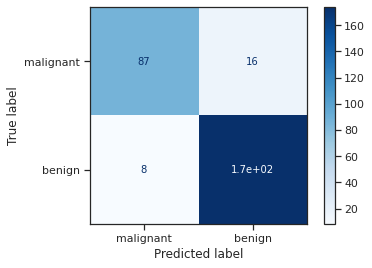

In [30]:
plot_confusion_matrix(cl1_2, cancer_X_test, cancer_y_test, 
                      display_labels=cancer.target_names, cmap=plt.cm.Blues)

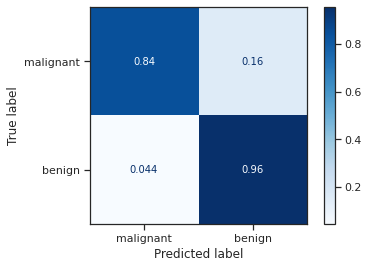

In [31]:
plot_confusion_matrix(cl1_2, cancer_X_test, cancer_y_test, 
                      display_labels=cancer.target_names,
                      cmap=plt.cm.Blues, normalize='true')

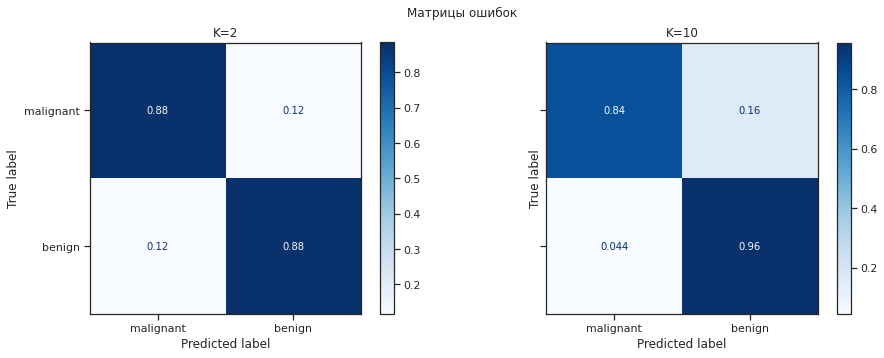

In [32]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

plot_confusion_matrix(cl1_1, cancer_X_test, cancer_y_test, 
                      display_labels=cancer.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[0])

plot_confusion_matrix(cl1_2, cancer_X_test, cancer_y_test, 
                      display_labels=cancer.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=2')
ax[1].title.set_text('K=10')

##**3) Precision, recall и F-мера**

In [33]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 2 ближайших соседей
precision_score(cancer_y_test, target1_1), recall_score(cancer_y_test, target1_1)

(0.930635838150289, 0.8846153846153846)

In [34]:
# Для 10 ближайших соседей
precision_score(cancer_y_test, target1_2), recall_score(cancer_y_test, target1_2)

(0.9157894736842105, 0.9560439560439561)

In [35]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(cancer_y_test, target1_1, average='micro')

0.8842105263157894

In [36]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(cancer_y_test, target1_1, average='macro')

0.8715679190751445

In [37]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(cancer_y_test, target1_1, average='weighted')

0.8879411317310617

###**F-мера**

In [38]:
f1_score(cancer_y_test, target1_2)

0.935483870967742

In [39]:
f1_score(cancer_y_test, target1_1, average='micro')

0.8842105263157894

In [40]:
f1_score(cancer_y_test, target1_1, average='macro')

0.8767769407140518

In [41]:
f1_score(cancer_y_test, target1_1, average='weighted')

0.8851662730360129

Функция classification_report позволяет выводить значения точности, полноты и F-меры для всех классов выборки.

In [42]:
classification_report(cancer_y_test, target1_1, 
                      target_names=cancer.target_names, output_dict=True)

{'accuracy': 0.8842105263157894,
 'benign': {'f1-score': 0.9070422535211268,
  'precision': 0.930635838150289,
  'recall': 0.8846153846153846,
  'support': 182},
 'macro avg': {'f1-score': 0.8767769407140518,
  'precision': 0.8715679190751445,
  'recall': 0.8840552651232263,
  'support': 285},
 'malignant': {'f1-score': 0.8465116279069768,
  'precision': 0.8125,
  'recall': 0.883495145631068,
  'support': 103},
 'weighted avg': {'f1-score': 0.8851662730360129,
  'precision': 0.8879411317310617,
  'recall': 0.8842105263157894,
  'support': 285}}

#**Стратегии кросс-валидации**

In [0]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

###**K-fold**

In [44]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        cancer.data, cancer.target, scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.00461268, 0.00116181, 0.00116491, 0.00106263, 0.001091  ]),
 'score_time': array([0.01139617, 0.00795913, 0.00789094, 0.00695252, 0.00687551]),
 'test_f1': array([0.87833964, 0.9122807 , 0.94764978, 0.90663256, 0.89111744]),
 'test_precision': array([0.89296517, 0.9122807 , 0.94855194, 0.9172852 , 0.91524629]),
 'test_recall': array([0.87719298, 0.9122807 , 0.94736842, 0.90350877, 0.88495575]),
 'train_f1': array([0.97605126, 0.96732351, 0.96727296, 0.9650388 , 0.97162092]),
 'train_precision': array([0.97753988, 0.96981109, 0.96967738, 0.96766249, 0.97335361]),
 'train_recall': array([0.97582418, 0.96703297, 0.96703297, 0.96483516, 0.97149123])}

###**Repeated K-Fold**

In [45]:
kf = RepeatedKFold(n_splits=5, n_repeats=2)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        cancer.data, cancer.target, scoring=scoring, 
                        cv=kf, return_train_score=False)
scores, np.mean(scores['test_precision'])

({'fit_time': array([0.00244737, 0.0010705 , 0.00112605, 0.00106359, 0.00104475,
         0.00108576, 0.00103593, 0.00109339, 0.00103092, 0.00102997]),
  'score_time': array([0.00895882, 0.00707459, 0.00692487, 0.00701952, 0.00689721,
         0.00706792, 0.00712609, 0.00691986, 0.00688624, 0.00931263]),
  'test_f1': array([0.91479967, 0.95642996, 0.89698771, 0.94716501, 0.89304339,
         0.90574567, 0.90239212, 0.90580438, 0.91260832, 0.93803367]),
  'test_precision': array([0.93177388, 0.95809814, 0.90829731, 0.94757348, 0.89747492,
         0.91951025, 0.90271543, 0.9153053 , 0.9151893 , 0.93816143]),
  'test_recall': array([0.9122807 , 0.95614035, 0.89473684, 0.94736842, 0.89380531,
         0.90350877, 0.90350877, 0.90350877, 0.9122807 , 0.9380531 ])},
 0.9234099446595081)

###**ShuffleSplit**

Генерируется N случайных перемешиваний данных, в каждом перемешивании заданная доля помещается в тестовую выборку.

In [46]:
kf = ShuffleSplit(n_splits=5, test_size=0.25)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        cancer.data, cancer.target, scoring=scoring, 
                        cv=kf, return_train_score=False)
scores

{'fit_time': array([0.00182581, 0.00102854, 0.00102663, 0.00116014, 0.00100994]),
 'score_time': array([0.01241708, 0.00808048, 0.00803518, 0.00846529, 0.00801444]),
 'test_f1': array([0.87412587, 0.92318645, 0.91635089, 0.89531463, 0.9020979 ]),
 'test_precision': array([0.87412587, 0.92338898, 0.91698836, 0.89561654, 0.9020979 ]),
 'test_recall': array([0.87412587, 0.92307692, 0.91608392, 0.8951049 , 0.9020979 ])}

#**Оптимизация гиперпараметров**

##**Grid Search**

In [47]:
n_range = np.array(range(1,15,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}]

In [48]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(cancer_X_train, cancer_y_train)


CPU times: user 284 ms, sys: 0 ns, total: 284 ms
Wall time: 286 ms


In [49]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00091767, 0.00068064, 0.00072966, 0.0006598 , 0.00063391,
        0.00063553, 0.00064073, 0.00064344, 0.00064263, 0.0006258 ,
        0.00078754, 0.00063276, 0.0006557 , 0.00062914]),
 'mean_score_time': array([0.0035708 , 0.00283265, 0.00283136, 0.00281153, 0.00283117,
        0.00284863, 0.00284986, 0.00286865, 0.00285835, 0.0029449 ,
        0.00350924, 0.00289102, 0.00313835, 0.0030261 ]),
 'mean_test_score': array([0.92957393, 0.91898496, 0.94367168, 0.92957393, 0.94010025,
        0.92957393, 0.93652882, 0.93652882, 0.94003759, 0.94003759,
        0.93646617, 0.92938596, 0.93646617, 0.93295739]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_n

In [50]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
clf_gs.best_score_

0.9436716791979951

In [52]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 3}

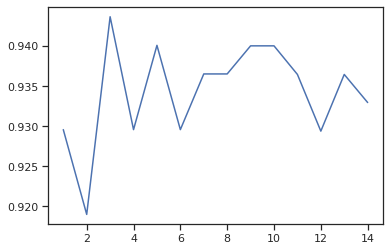

In [53]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

###**Grid search с стратегией KFold кросс-валидации**

In [0]:
kf = KFold(n_splits=10)

In [55]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
clf_gs.fit(cancer_X_train, cancer_y_train)

CPU times: user 417 ms, sys: 731 µs, total: 418 ms
Wall time: 422 ms


In [56]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00090547, 0.00074117, 0.00074036, 0.00093365, 0.00079889,
        0.00076573, 0.00074391, 0.00074277, 0.00082159, 0.00091932,
        0.00084972, 0.00090892, 0.00078335, 0.00074477]),
 'mean_score_time': array([0.00185347, 0.00169189, 0.00166731, 0.00213156, 0.00170612,
        0.00173016, 0.0016634 , 0.00166686, 0.00182595, 0.00206256,
        0.00194466, 0.00201693, 0.00182531, 0.00173807]),
 'mean_test_score': array([0.94371921, 0.92610837, 0.94014778, 0.94014778, 0.94384236,
        0.93669951, 0.94371921, 0.94027094, 0.94371921, 0.94371921,
        0.93657635, 0.9364532 , 0.9294335 , 0.93288177]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_n

In [57]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
clf_gs.best_score_

0.9438423645320198

In [59]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 5}

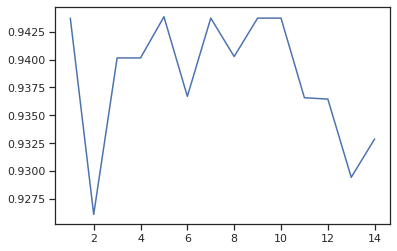

In [60]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

#####**сравнивая качество модели между K = 5, K = 10**

In [61]:
# 10 ближайших соседей
accuracy_score(cancer_y_test, target1_2)

0.9157894736842105

In [62]:
# 4 ближайших соседей
cl1_3 = KNeighborsClassifier(n_neighbors=5)
cl1_3.fit(cancer_X_train, cancer_y_train)
target1_3 = cl1_3.predict(cancer_X_test)
accuracy_score(cancer_y_test, target1_3)

0.9052631578947369

В этом тестовом наборе данных мы отмечаем, что K = 10 лучше, чем K = 5, хотя при поиске по сетке K = 5 является лучшим выбором.
Это происходит из-за выбора конкретного набора тестовых данных, но в целом K = 5 будет лучше.

#**Построение кривых обучения и валидации**

##**Построение кривых обучения - learning_curve**

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

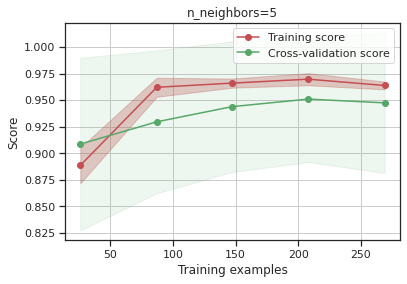

In [64]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    cancer_X_train, cancer_y_train, cv=20)


##**Построение кривой валидации - validation_curve**

In [0]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

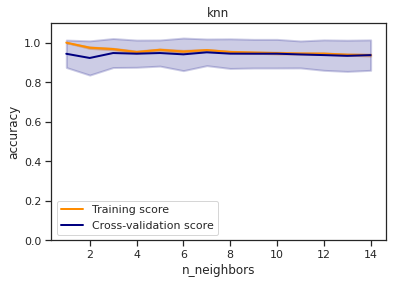

In [66]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      cancer_X_train, cancer_y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=20, scoring="accuracy")